In [1]:
import pandas as pd
df=pd.read_csv('../data/cleaned/Food_Production_cleaned.csv')

In [13]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per kilogram',
       'Freshwater withdrawals per kilogram',
       'Greenhouse gas emissions per 100g protein', 'Land use per kilogram',
       'Scarcity-weighted water use per kilogram'],
      dtype='object')

In [14]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [15]:
# QUESTION 1

# What product exhibits the highest environmental impact for all environmental markers used to measure 
#(total emissions, nitrogen leaching, freshwater withdrawal, and land use change)? 

#Is there a single product that ranks the highest across all of them?


In [28]:
import matplotlib.pyplot as plt

# List of products
products = [
    'Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal', 'Rice',
    'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar', 'Other Pulses', 'Peas',
    'Nuts', 'Groundnuts', 'Soymilk', 'Tofu', 'Soybean Oil', 'Palm Oil',
    'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Tomatoes', 'Onions & Leeks',
    'Root Vegetables', 'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
    'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
    'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton',
    'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese', 'Eggs', 'Fish (farmed)',
    'Shrimps (farmed)'
]

# Dictionary to store the product with the highest impact for each marker
highest_impact_products = {}

# Columns related to environmental markers
environmental_markers = ['Total_emissions', 'Eutrophying emissions per kilogram',
                         'Freshwater withdrawals per kilogram', 'Land use change']

# Iterate over each product and find the highest impact for each marker
for product in products:
    product_data = df[df['Food product'] == product]
    highest_impact = {}
    for marker in environmental_markers:
        max_value = product_data[marker].max()
        highest_impact[marker] = max_value
    highest_impact_products[product] = highest_impact

# Finding the product with the highest impact across all markers
overall_highest_product = max(highest_impact_products, key=lambda x: sum(highest_impact_products[x].values()))

# Displaying the product with the highest overall impact
print(f"The product with the highest overall impact across all environmental markers is: {overall_highest_product}")



The product with the highest overall impact across all environmental markers is: Cheese


<Figure size 1200x600 with 0 Axes>

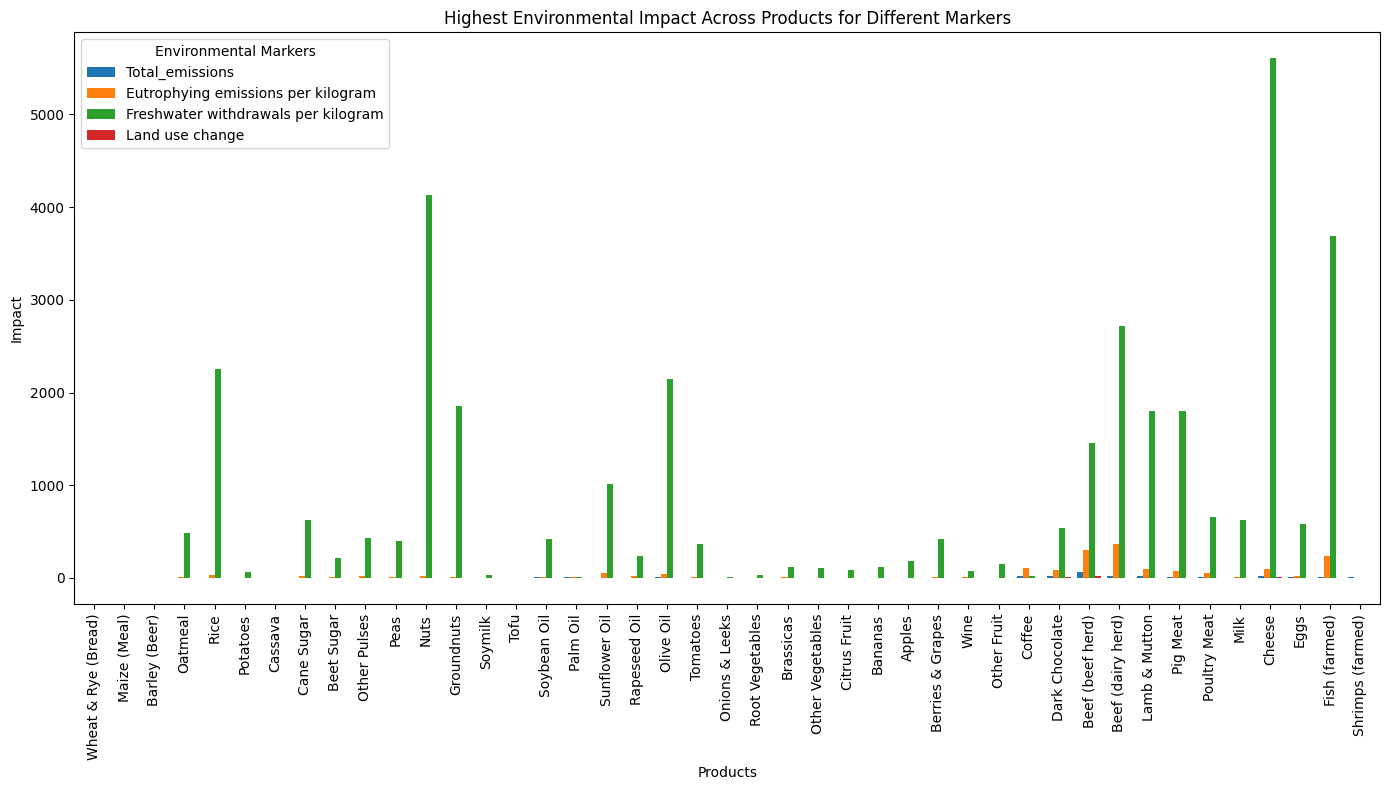

In [30]:
# Creating a DataFrame from the highest_impact_products dictionary
df_impact = pd.DataFrame(highest_impact_products).T

# Plotting a bar plot for the highest impact of each product across markers
plt.figure(figsize=(12, 6))
df_impact.plot(kind='bar', width=0.8, figsize=(14, 8))
plt.title('Highest Environmental Impact Across Products for Different Markers')
plt.xlabel('Products')
plt.ylabel('Impact')
plt.xticks(rotation=90)
plt.legend(title='Environmental Markers')
plt.tight_layout()
plt.show()


In [ ]:
# EXPLANATION



In [20]:
# QUESTION 2
# Which step from the food production cycle is the most carbon emissions across all food production?


# Selecting columns related to the food production cycle steps
production_steps = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']

# Calculate the total carbon emissions for each step
total_emissions_per_step = {}
for step in production_steps:
    total_emissions_per_step[step] = df[step].sum()

# Looking for the highest total carbon emissions
most_carbon_intensive_step = max(total_emissions_per_step, key=total_emissions_per_step.get)
max_emissions = total_emissions_per_step[most_carbon_intensive_step]

print(f"The most carbon-intensive step across all products is '{most_carbon_intensive_step}' "
      f"with a total of {max_emissions:.2f} emissions.")



The most carbon-intensive step across all products is 'Farm' with a total of 149.20 emissions.


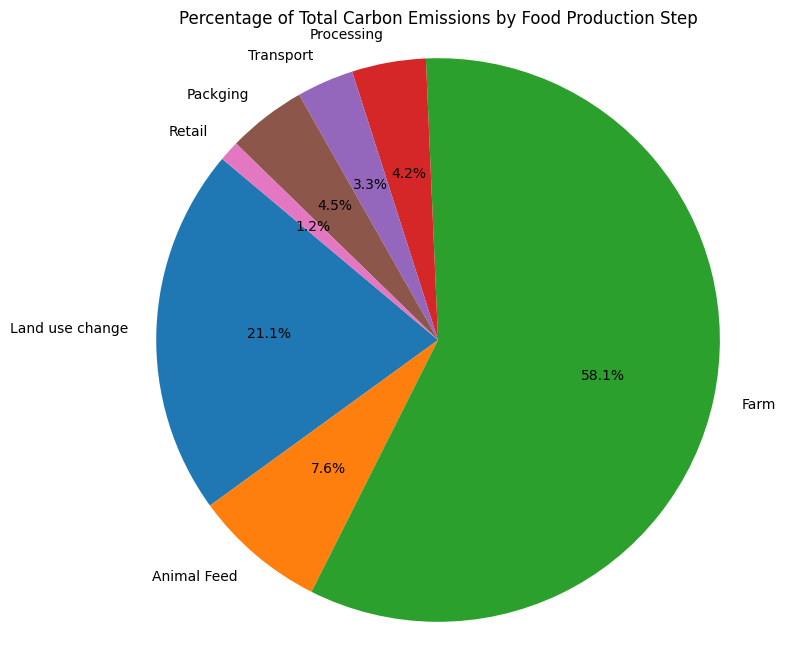

In [27]:
# Pie chart to visualize the carbon emissions for each step

plt.figure(figsize=(8, 8))
plt.pie(total_emissions_per_step.values(), labels=total_emissions_per_step.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Carbon Emissions by Food Production Step')
plt.axis('equal')
plt.show()


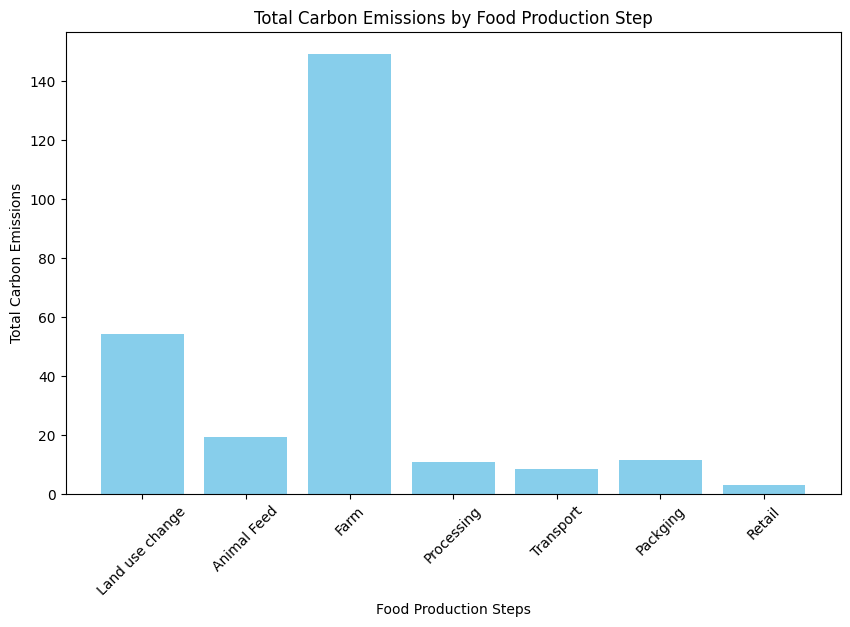

In [24]:
# bar plot to visualize the carbon emissions in Food Production

plt.figure(figsize=(10, 6))
plt.bar(total_emissions_per_step.keys(), total_emissions_per_step.values(), color='skyblue')
plt.xlabel('Food Production Steps')
plt.ylabel('Total Carbon Emissions')
plt.title('Total Carbon Emissions by Food Production Step')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# EXPLANATION